# Задача 1.
Напишите простейший класс, который реализует оценку линейной регрессионной модели методом OLS и позволяет получить оценки коэффициентов, их ковариационной матрицы, предсказанные значения и оценку стандартной ошибки прогноза для случая гомоскедастичности. Из модулей разрешается использовать только numpy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

In [2]:
class OLS():
    def __init__ (self, x, y):
        self.x=y
        self.y=x
        self.beta = ((np.linalg.inv((self.x.T).dot(self.x)).dot(self.x.T)).dot(self.y))
        self.sigma = (1./(self.x.shape[0]-self.x.shape[1]))*((self.y - (self.x).dot(self.beta)).T).dot(self.y - (self.x).dot(self.beta))
        self.V = self.sigma*(np.linalg.inv((self.x.T).dot(self.x)))
    def predict (self, a):
        self.input = a
        self.z =(self.input.T).dot(self.beta)
        self.Vy = self.sigma*(1+(self.input.T).dot(np.linalg.inv((self.x.T).dot(self.x))).dot(self.input))
        return (self.z , self.Vy)

In [3]:
 X = np.random.randn(100,3)

In [4]:
Y = X.dot(np.array([1,2,3]))+np.random.randn(100)

In [5]:
model = OLS(Y, X)

In [6]:
model.beta

array([ 1.05022053,  2.03336265,  2.9952136 ])

In [7]:
model.V

array([[ 0.00730585, -0.00076047,  0.0002563 ],
       [-0.00076047,  0.0067408 , -0.00063082],
       [ 0.0002563 , -0.00063082,  0.00890235]])

In [8]:
model.predict(np.array([1,0,1]))

(4.0454341274746666, 0.84564519096856305)

# Задача2.
Для начала сгенерируйтевыборку{(𝑥𝑖,𝑦𝑖),𝑖=1,...,200}следующимобразом:

(1) Сгенерируйте коэффициенты 𝛽0, ..., 𝛽10 как величины, равномерно распределенные на интервале (0, 1) (numpy.random.rand()).

(2) Сгенерируйте величины 𝑥𝑖 как случайные числа, распределенные равномерно в интервале (−5, 5).

(3) Сгенерируйте ошибки 𝑢𝑖 как случайные числа, подчиняющиеся нормальному рас- пределению 𝒩(0, 100) (numpy.random.randn()).

(4) Сгенерируйте 𝑦𝑖 следующим образом:
10 𝑥𝑖𝑘
𝑦𝑖 = ∑ 𝛽𝑘 𝑘! + 𝑢𝑖.
𝑘=0

(5) Нарисуйтеоблакоточек,соответствующееданнойвыборке(matplotlib.pyplot.scatter()). Пример см. на рис. 1.
Далее с помощью класса OLS из задачи 1 для 𝐾 = 1, ..., 4 оцените модель 𝐾
𝑦𝑖 = ∑ 𝛾𝑘𝑥𝑘 + 𝑢𝑖 𝑘=0
и изобразите эти линии регрессий на рисунке вместе с облаком точек (получите предска- занные значения 𝑦̂ для 𝑥, принимающего значения на некоторой решетке на [−5, 5], затем нарисуйте график с помощью matplotlib.pyplot.plot()). Пример см. на рис. 2.

In [9]:
#beta = np.array([1,1])
beta = np.random.rand(11)
beta

array([ 0.62715823,  0.5837953 ,  0.89281147,  0.32373927,  0.32211804,
        0.31292118,  0.84390371,  0.59233228,  0.0036831 ,  0.67473986,
        0.87649526])

In [10]:
xi = np.random.uniform(-5,5,200)

In [11]:
#plt.hist((np.random.randn(200)*10), bins = 50)
#plt.show()
u = np.random.randn(200)*10

In [12]:
def fun(g):
    k=0
    for i in range(len(beta)):
        k = ((g**i)*beta[i])/math.factorial(i)+k
    return k

In [13]:
fun(1)

1.7286368884467069

In [14]:
yi = np.zeros((200,))
for j in range(len(yi)):
        #for n in range(len(u)):
    yi[j] = fun(xi[j])+u[j]    

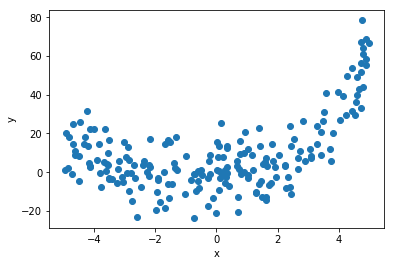

In [15]:
plt.scatter(xi , yi)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
np.power( xi, 0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [17]:
def create_matrix ( x , K):
    m = np.zeros( (len(xi) , K+1))
    for i in range(K+1):
        s = np.power( x, i)
        m[:,i ] =s
        #print(s)
    return (m)



In [18]:
X_1 = create_matrix ( xi , 1)
model1 = OLS(yi, X_1)

In [19]:
X_2 = create_matrix ( xi , 2)
model2 = OLS(yi, X_2)

In [20]:
X_3 = create_matrix ( xi , 3)
model3 = OLS(yi, X_3)

In [21]:
X_4 = create_matrix ( xi , 4)
model4 = OLS(yi, X_4)

In [22]:
xrand = np.arange(-5, 5, 0.05)

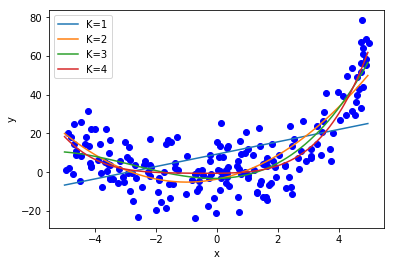

In [23]:
plt.scatter(xi , yi, c = 'blue')
value = np.zeros (len (xrand))
errors = np.zeros (len (xrand))
for k in range (1,5):
    X = create_matrix ( xi , k)
    modelx = OLS(yi, X)
    for t in range (len(xrand)):
        value[t] = (modelx.predict(create_matrix(xrand, k)[t]))[0]
        errors[t] = (modelx.predict(create_matrix(xrand, k)[t]))[1]
    plt.plot( xrand , value,label = 'K=' + str(k))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()    
plt.show()    

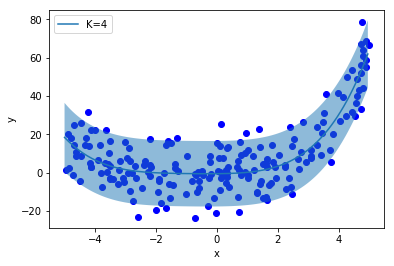

In [24]:
plt.scatter(xi , yi, c = 'blue')
value = np.zeros (len (xrand))
errors = np.zeros (len (xrand))
K = 4
X = create_matrix ( xi , k)
modelx = OLS(yi, X)
for t in range (len(xrand)):
    value[t] = (modelx.predict(create_matrix(xrand, k)[t]))[0]
    errors[t] = (modelx.predict(create_matrix(xrand, k)[t]))[1]
plt.plot( xrand , value,label = 'K=' + str(k))
plt.fill_between(  xrand,   value - 1.64*np.sqrt(errors), value + 1.64*np.sqrt(errors), alpha = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()    
plt.show()    

# Задача3. 
Сгенерируйтематрицу𝐴размера100×100случайныхвеличин,подчиняющихся стандартному нормальному распределению. Для каждого столбца сосчитайте 90%-ный доверительный интервал для математического ожидания и выведите на печать
(1) Массив логических величин, показывающих, принадлежит ли число 0 соответ- ствующему доверительному интервалу. (Квантиль 𝑡-распределения с 𝑚 степенями свободы можно сосчитать с помощью функции scipy.stats.t.ppf(p,m))
(2) Число столбцов, для которых значение элементов массива из предыдущего пункта истинно.
Повторите эти же вычисления для каждой строки. Прокомментируйте качество генератора случайных чисел в numpy. Пример вывода (для столбцов):

In [25]:
G = np.random.randn(100,100)

In [26]:
SE = G.std(axis=0)/(np.sqrt(100))

In [27]:
mean = G.mean(axis=0)

In [28]:
alpha = 1-0.9
z = abs(stats.norm.ppf(alpha/2))
z

1.6448536269514729

In [29]:
b = 0
Bul = []
ci_low = mean - z * SE # ci confidence interval
ci_hi = mean + z * SE
for i in range(len(ci_low)):
    if (ci_low[i] <b< ci_hi[i]):
        Bul.append('True')
    else:
        Bul.append('False')
Bul[3]

'True'

In [30]:
Bul.count('True')

85

In [31]:
SE2 = G.std(axis=1)/(np.sqrt(100))
mean2 = G.mean(axis=1)


In [32]:
b2 = 0
Bul2 = []
ci_low2 = mean2 - z * SE2 # ci confidence interval
ci_hi2 = mean2 + z * SE2
for i in range(len(ci_low2)):
    if (ci_low2[i] <b2< ci_hi2[i]):
        Bul2.append('True')
    else:
        Bul2.append('False')

In [33]:
Bul2.count('True')

93

 Из этого теста: если бы генератор работал идеально, то 90% выборки бы попадало в заданный доверительный интервал, то есть значение TRUE встречалось бы 90 раз, но мы этого не наблюдаем, число TRUE не всегда равно 90 для выборки. Однако, стоит заметить, что числа все равно близкие к 90, что говорит о небольшом отклонении от нормального распределения.

# Задача 4. 
На my.NES вы можете скачать файл goalies-2014-2016.csv со статистическими данными о вратарях Национальной хоккейной лиги. 

(1) Загрузите данный файл в pandas.DataFrame. Заметьте, что в нем разделителями слу- жат точки с запятой. Покажите первые 5 строк первых шести столбцов полученного набора данных. Пример вывода:

(2) Проверьте,чтопроцентотраженныхбросков(save_percentage)сосчитанправильно (с точностью до третьего знака после запятой). Для этого сосчитайте его сами (с использованием показателей числа отраженных бросков (saves) и общего числа бросков (shots_against)) и найдите наибольшее абсолютное отклонение. 

(3) Вычислите средние и стандартные отклонения для следующих показателей: число проведенных игр (games_played), число пропущенных шайб (goals_against), процент отраженных бросков (save_percentage). 

(4) Для сезона 2016-17 найдите вратаря (player) с наибольшим процентом отраженных бросков (save_percentage) среди тех, кто провел более 40 матчей (games_played)

(5) Для каждого сезона найдите вратаря, который отразил наибольшее число бросков (saves). 

(6) Найдите всех вратарей, которые в каждом из трех сезонов выигрывали не менее 30 матчей (wins). 

In [34]:
import pandas as pd

In [35]:
frame = pd.read_csv('goalies-2014-2016.csv',header=0,sep = ';')

In [36]:
frame.iloc[0:5,0:6]

,n,player,season,team,position,games_played
0,1,Cam Talbot,2016-17,EDM,G,73
1,2,Braden Holtby,2016-17,WSH,G,63
2,3,Sergei Bobrovsky,2016-17,CBJ,G,63
3,4,Devan Dubnyk,2016-17,MIN,G,65
4,5,Tuukka Rask,2016-17,BOS,G,65


In [37]:
maximum = max(abs(frame['save_percentage']-frame['saves']/frame['shots_against']))
maximum

0.00059325605900950595

In [38]:
frame [ ['games_played', 'goals_against', 'save_percentage'] ].mean(axis = 0)

games_played       28.476703
goals_against      67.605735
save_percentage     0.901179
dtype: float64

In [50]:
frame [ ['games_played', 'goals_against', 'save_percentage'] ].std(axis = 0)

games_played       22.285395
goals_against      53.351779
save_percentage     0.071260
dtype: float64

In [40]:
frame_4 = frame[(frame.season =='2016-17')& (frame.games_played > 40)  ]  
frame_4[frame_4.save_percentage == max(frame_4.save_percentage)] [['player','save_percentage']]

,player,save_percentage
2,Sergei Bobrovsky,0.931


In [41]:
#Для каждого сезона найдите вратаря, который отразил наибольшее число бросков (saves). 

In [42]:
frame[ frame.saves.isin(frame.groupby('season').max().saves.values)  ]  [  ['season'   , 'player',  'saves'] ]

,season,player,saves
0,2016-17,Cam Talbot,1946
102,2015-16,Henrik Lundqvist,1788
189,2014-15,Braden Holtby,1887


In [43]:
frame.groupby( 'player').min().wins

player
Aaron Dell            11
Al Montoya             6
Alex Nedeljkovic       0
Alex Stalock           1
Anders Lindback        5
Anders Nilsson        10
Andrei Vasilevskiy     7
Andrew Hammond         0
Andrey Makarov         0
Anthony Stolarz        2
Antoine Bibeau         1
Anton Forsberg         0
Anton Khudobin         3
Antti Niemi           12
Antti Raanta           7
Ben Bishop            18
Ben Scrivens           5
Braden Holtby         41
Brian Elliott         23
Calvin Pickard         6
Cam Talbot            21
Cam Ward              22
Carey Price           10
Carter Hutton          6
Chad Johnson           8
Charlie Lindgren       1
Chris Driedger         0
Christopher Gibson     1
Connor Hellebuyck     13
Corey Crawford        32
                      ..
Ondrej Pavelec         4
Pekka Rinne           31
Peter Budaj            1
Petr Mrazek           16
Pheonix Copley         0
Philipp Grubauer       1
Ray Emery             10
Reto Berra             0
Richard Bachman   

In [44]:
#найдем сначала игроков, которые поиграли в трех сезонах

In [45]:
players_in_3_seasons =   (frame.groupby('player').count().season ==3)

In [46]:
players_in_3_seasons = players_in_3_seasons[players_in_3_seasons ==True]

In [47]:
frame_6 = frame[frame.player.isin(  players_in_3_seasons.index)]

In [48]:
frame_6_2  =frame_6 .groupby('player').min()

In [49]:
frame_6_2[frame_6_2['wins'] >=30] [ [ 'wins']  ]

,wins
player,
Braden Holtby,41
Corey Crawford,32
Devan Dubnyk,32
Henrik Lundqvist,30
Pekka Rinne,31
Tuukka Rask,31
